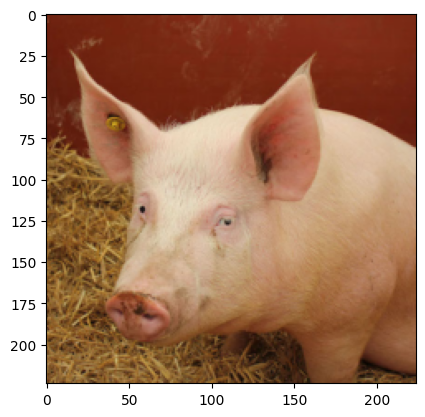

In [2]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

# read the image, resize to 224 and convert to PyTorch Tensor
pig_img = Image.open("pig.jpg")
preprocess = transforms.Compose([
   transforms.Resize(224),
   transforms.ToTensor(),
])
pig_tensor = preprocess(pig_img)[None,:,:,:]

# plot image (note that numpy using HWC whereas Pytorch user CHW, so we need to convert)
plt.imshow(pig_tensor[0].numpy().transpose(1,2,0))


In [3]:
import torch
import torch.nn as nn
from torchvision.models import resnet50

# simple Module to normalize an image
class Normalize(nn.Module):
    def __init__(self, mean, std):
        super(Normalize, self).__init__()
        self.mean = torch.Tensor(mean)
        self.std = torch.Tensor(std)
    def forward(self, x):
        return (x - self.mean.type_as(x)[None,:,None,None]) / self.std.type_as(x)[None,:,None,None]

# values are standard normalization for ImageNet images, 
# from https://github.com/pytorch/examples/blob/master/imagenet/main.py
norm = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# load pre-trained ResNet50, and put into evaluation mode (necessary to e.g. turn off batchnorm)
model = resnet50(pretrained=True)
model.eval();


/home/maria/Neurogarage2/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/maria/Neurogarage2/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
pred = model(norm(pig_tensor))
pred

tensor([[ 3.7593e+00,  3.2503e+00,  1.5318e+00,  2.0089e+00,  1.0908e+00,
          5.3037e+00,  2.8494e+00,  3.4273e+00,  3.3158e+00,  1.0625e+00,
         -1.0410e+00, -5.4555e-01, -1.2763e+00, -9.0664e-01, -1.4103e+00,
          1.9982e-01, -3.2718e+00, -2.2336e+00, -3.3918e-01, -5.3908e-01,
         -1.4593e+00, -3.2748e+00, -3.1585e+00,  1.2886e+00, -2.6868e+00,
          8.4224e-01,  1.2508e+00,  1.8760e+00,  1.7243e+00,  6.5247e+00,
         -6.9164e-01, -5.9965e-01,  1.4849e+00,  4.0206e+00,  3.2613e+00,
          1.2940e+00,  2.3770e+00,  1.4365e+00,  2.3621e+00, -8.6792e-01,
         -1.8666e+00, -4.1171e-02, -1.4949e+00, -8.8089e-02,  8.5850e-01,
          5.0927e-01, -1.9038e+00,  3.2701e+00,  7.5257e-01,  1.4365e+00,
          3.4214e-01,  4.5331e+00,  2.4282e+00, -1.2705e+00,  9.5924e-01,
         -1.5547e+00, -3.1129e-01, -7.0777e-01, -2.4607e+00, -1.4731e+00,
          5.5937e-01,  1.8268e+00,  8.5339e-01, -8.0821e-01, -5.6806e-01,
          2.5732e+00,  1.7862e+00, -4.